# Pagamentos Fraudulentos
<b> O pagamento online é o método de transação mais popular no mundo hoje. No entanto, com o aumento dos pagamentos online, também vem o aumento da fraude de pagamento. O objetivo deste estudo é identificar pagamentos fraudulentos e não fraudulentos. O conjunto de dados é coletado do Kaggle, que contém informações históricas sobre transações fraudulentas que podem ser usadas para detectar fraudes em pagamentos online. </b>

The dataset consists of 10 variables:

step: represents a unit of time where 1 step equals 1 hour
type: type of online transaction
amount: the amount of the transaction
nameOrig: customer starting the transaction
oldbalanceOrg: balance before the transaction
newbalanceOrig: balance after the transaction
nameDest: recipient of the transaction
oldbalanceDest: initial balance of recipient before the transaction
newbalanceDest: the new balance of recipient after the transaction
isFraud: fraud transaction

## Importações

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

## <b> EDA  </b>

In [108]:
df = pd.read_csv('onlinefraud.csv')
df.drop('isFlaggedFraud', axis=1, inplace=True)

In [109]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
] 

In [113]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')

In [13]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6357754,710,CASH_OUT,198919.47,C215729361,22298.00,0.00,C387130849,128040.48,326959.94,0
5706757,398,PAYMENT,259.00,C1569071717,0.00,0.00,M1543621637,0.00,0.00,0
2054640,181,TRANSFER,656209.54,C502717375,34276.00,0.00,C1652339388,347416.20,1008842.73,0
4679031,331,CASH_IN,138631.69,C1749473779,9401958.97,9540590.66,C199512387,1626805.91,1488174.22,0
3422376,256,CASH_OUT,125232.74,C525834543,0.00,0.00,C1448947058,251199.07,376431.82,0


In [14]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [15]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [105]:
sns.set_style('whitegrid')
colors = plt.cm.Blues(np.linspace(0.2, 1, len(transaction_counts)))
plt.rcParams['figure.figsize'] = (8,6)

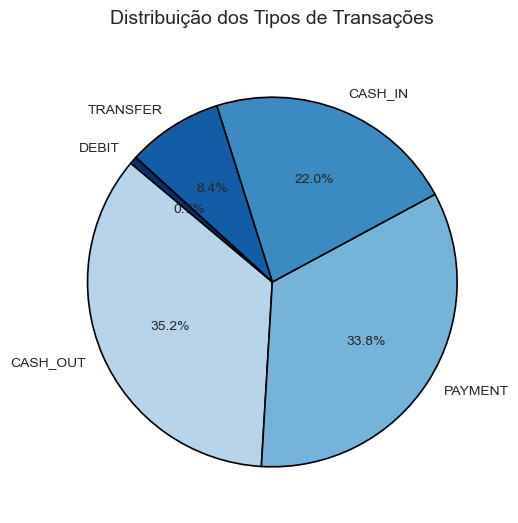

Análise de Transações Fraudulentas por Tipo:
       type  fraud_count  total_count  fraud_proportion
0  CASH_OUT         4116      2237500          0.001840
1  TRANSFER         4097       532909          0.007688
2   CASH_IN            0      1399284          0.000000
3     DEBIT            0        41432          0.000000
4   PAYMENT            0      2151495          0.000000


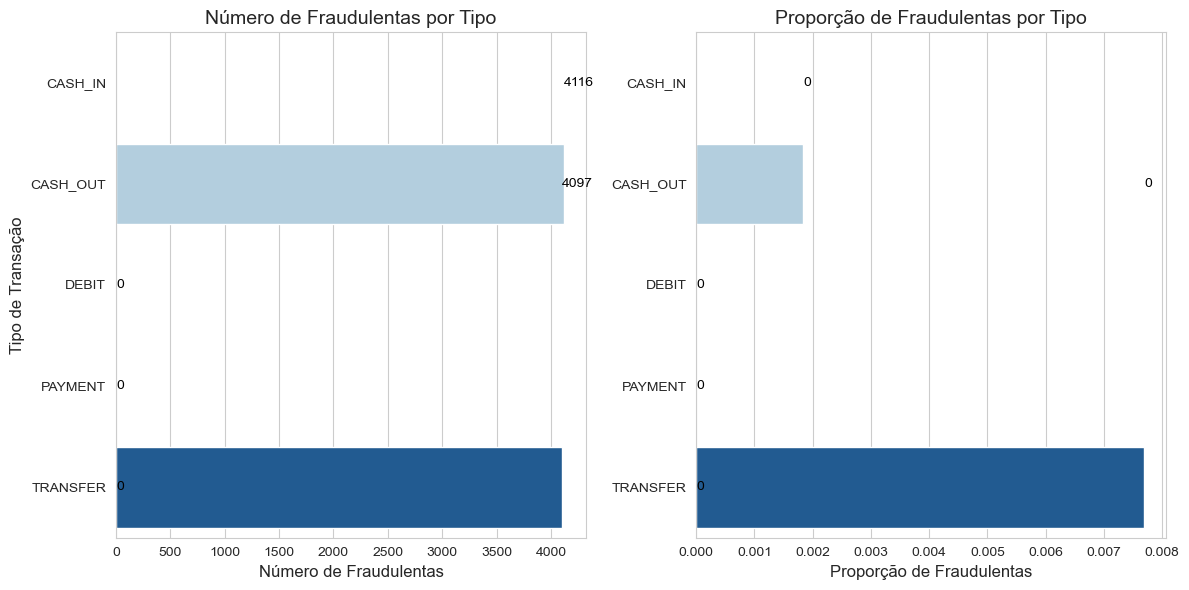

C:\Users\user\AppData\Local\Temp\ipykernel_11032\3305658988.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_amount_by_type = df.groupby('type')['amount'].sum().reset_index()


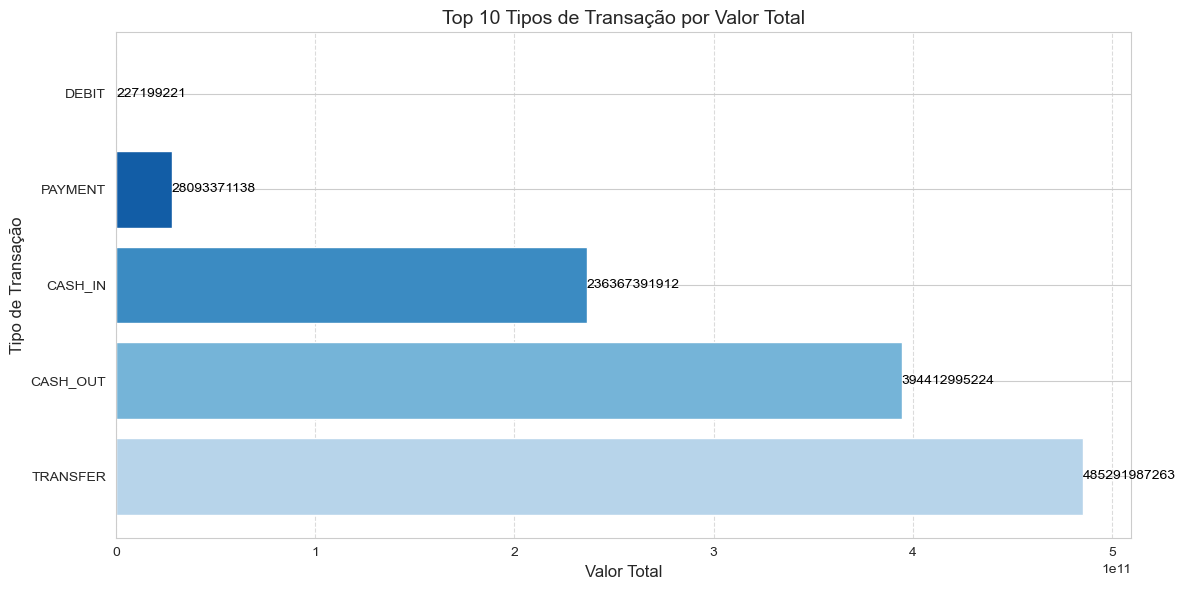

In [122]:
plt.rcParams['figure.figsize'] = (12, 6)

def plot_pie_chart(data, title):
    plt.pie(data, labels=data.index, colors=plt.cm.Blues(np.linspace(0.3, 1, len(data))),
            autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2})
    plt.title(title, fontsize=14, pad=20)

# Função para plotar gráfico de barras
def plot_bar_chart(data, x, y, title, xlabel, ylabel, palette='Blues', legend_title=None):
    sns.barplot(x=x, y=y, data=data, hue=y, palette=palette, legend=False)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    for index, value in enumerate(data[x]):
        plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=10, color='black')
    if legend_title:
        plt.legend(title=legend_title)

# Função para plotar gráfico de barras horizontais
def plot_horizontal_bar_chart(data, x, y, title, xlabel, ylabel, colors):
    plt.barh(data[y], data[x], color=colors)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    for bar in plt.gca().patches:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(round(width))}', 
                 va='center', ha='left', fontsize=10, color='black')
    plt.grid(axis='x', linestyle='--', alpha=0.7)


# Verificar colunas e plotar gráficos
if {'type', 'isFraud', 'amount'}.issubset(df.columns):
    # Gráfico de pizza: Distribuição dos tipos de transações
    transaction_counts = df['type'].value_counts()
    plot_pie_chart(transaction_counts, 'Distribuição dos Tipos de Transações')
    plt.show()

    # Análise de transações fraudulentas
    fraud_transactions = df[df['isFraud'] == 1]
    fraud_by_type = fraud_transactions['type'].value_counts().reset_index()
    fraud_by_type.columns = ['type', 'fraud_count']
    total_by_type = df['type'].value_counts().reset_index()
    total_by_type.columns = ['type', 'total_count']
    fraud_analysis = pd.merge(fraud_by_type, total_by_type, on='type')
    fraud_analysis['fraud_proportion'] = fraud_analysis['fraud_count'] / fraud_analysis['total_count']
    fraud_analysis_sorted = fraud_analysis.sort_values(by='fraud_count', ascending=False)

    print("Análise de Transações Fraudulentas por Tipo:")
    print(fraud_analysis_sorted)

    # Gráficos de barras: Número e proporção de fraudes
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plot_bar_chart(fraud_analysis_sorted, 'fraud_count', 'type', 'Número de Fraudulentas por Tipo', 'Número de Fraudulentas', 'Tipo de Transação')
    plt.subplot(1, 2, 2)
    plot_bar_chart(fraud_analysis_sorted, 'fraud_proportion', 'type', 'Proporção de Fraudulentas por Tipo', 'Proporção de Fraudulentas', '')
    plt.tight_layout()
    plt.show()

    # Gráfico de barras horizontais: Top 10 tipos de transação por valor total
    total_amount_by_type = df.groupby('type')['amount'].sum().reset_index()
    total_amount_by_type_sorted = total_amount_by_type.sort_values(by='amount', ascending=False)
    top_10_types = total_amount_by_type_sorted.head(10)
    colors = plt.cm.Blues(np.linspace(0.3, 1, len(top_10_types)))
    plot_horizontal_bar_chart(top_10_types, 'amount', 'type', 'Top 10 Tipos de Transação por Valor Total', 'Valor Total', 'Tipo de Transação', colors)
    plt.tight_layout()
    plt.show()
else:
    print("As colunas 'type', 'isFraud' e/ou 'amount' não foram encontradas no dataset.")

<b> O fato de Cash Out ser o tipo de transação com o maior valor total (394.412.985.224) sugere que os usuários estão retirando grandes quantias de dinheiro do sistema. Esse comportamento pode indicar que os usuários estão transferindo fundos para contas externas ou convertendo saldos em dinheiro físico, seja para uso pessoal ou para outras finalidades. Transações de alto valor, como saques de investimentos, pagamentos de salários ou transferências para contas pessoais, são comuns nessa categoria, o que justifica o volume significativo.</b>

<b> Além disso, a análise mostra que Cash Out e Cash In são os tipos de transação com o maior número de atividades fraudulentas, com 4.097 e 4.106 casos, respectivamente. No entanto, é importante notar que Transfer, Payment e Debit não apresentaram nenhum caso de fraude nos dados analisados. Embora a proporção de fraudes em relação ao total de transações seja relativamente baixa (0,08% para Cash Out e Cash In), o volume absoluto de fraudes é preocupante. Isso indica que, embora a maioria das transações seja legítima, ainda há um número significativo de atividades fraudulentas que precisam ser monitoradas. </b>

<b> Outro ponto importante é a distribuição dos tipos de transações. O gráfico de pizza revela que Cash Out representa 35,2% do total de transações, seguido por Transfer (33,8%) e Payment (22,0%). Essa distribuição reforça a predominância de Cash Out e Transfer no sistema, tanto em volume de transações quanto em valor total. </b>

<b> Portanto, é essencial monitorar de perto as operações de Cash Out e Cash In para identificar padrões suspeitos, como saques repetidos de alto valor ou transferências para contas desconhecidas. A implementação de medidas de segurança adicionais, como autenticação de dois fatores e alertas em tempo real, pode ajudar a mitigar os riscos associados a essas transações. </b>


In [16]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


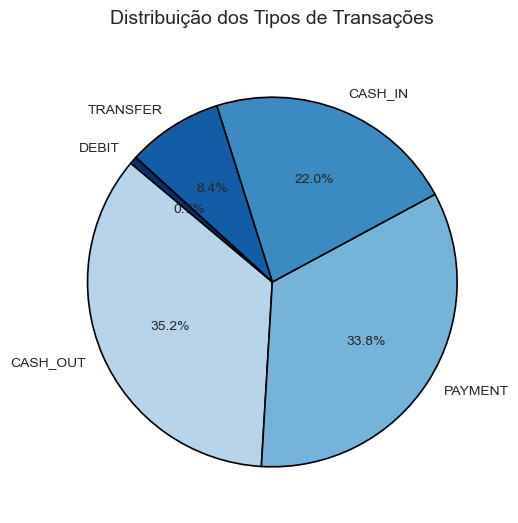

In [119]:
if {'type', 'isFraud', 'amount'}.issubset(df.columns):
    # Gráfico de pizza: Distribuição dos tipos de transações
    transaction_counts = df['type'].value_counts()
    plot_pie_chart(transaction_counts, 'Distribuição dos Tipos de Transações')
    plt.show()

In [125]:
if {'type', 'isFraud', 'amount'}.issubset(df.columns):
    fraud_transactions = df[df['isFraud'] == 1]
    fraud_by_type = fraud_transactions['type'].value_counts().reset_index()
    fraud_by_type.columns = ['type', 'fraud_count']
    total_by_type = df['type'].value_counts().reset_index()
    total_by_type.columns = ['type', 'total_count']
    fraud_analysis = pd.merge(fraud_by_type, total_by_type, on='type')
    fraud_analysis['fraud_proportion'] = fraud_analysis['fraud_count'] / fraud_analysis['total_count']
    fraud_analysis_sorted = fraud_analysis.sort_values(by='fraud_count', ascending=False)
    print(fraud_analysis_sorted)

       type  fraud_count  total_count  fraud_proportion
0  CASH_OUT         4116      2237500          0.001840
1  TRANSFER         4097       532909          0.007688
2   CASH_IN            0      1399284          0.000000
3     DEBIT            0        41432          0.000000
4   PAYMENT            0      2151495          0.000000
